In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pyecog as pg

In [8]:
pg

<module 'pyecog' (namespace)>

In [2]:
ls

M1493298027.ndf
M1493298027_2017-04-27_14_00_27 tids_[1, 2, 5].h5
M1495834723_2017-05-26_22_38_43 tids_[5, 6, 7, 8, 9, 10].h5
PyECoG_logfile.log
Spell 1 - Automated Power Extraction (from NDF files) (AS, Nov 2016).ipynb
demo_loading_ndfs_notebook.ipynb


In [4]:
ndf_filepath = 'test_ndf_conversion/M1456819229.ndf'
ndf_filepath = 'M1493298027.ndf'

# Loading the file:
- make a ndf_file object and then call load method
- when making the calling the NdfFile class, can specify the sampling frequency, or leave it as auto
- then call the load method, specify a single or list of read ids, or 'all'. 

In [7]:
%%time
ndf_file = pg.NdfFile(ndf_filepath, verbose = True, fs = 'auto')
ndf_file.load(read_ids='all',
              auto_glitch_removal=True,
              auto_resampling=True,
              auto_filter=True)

AttributeError: module 'pyecog' has no attribute 'NdfFile'

To access individual transmitters:
```python
ndf_file.tid_set
```
ontains the valid transmitter id's the ndf file. And you can index the file with the transmitter number. Doing this returns a dictionary with data and time fields.

In [7]:
ndf_file.tid_set

{1, 2, 6, 7}

In [9]:
ndf_file[2]

{'data': array([-11.45658584, -10.66713262,  -9.88404059, ..., -27.75042264,
        -15.27384139,  -9.18409354]),
 'time': array([  0.00000000e+00,   3.90625424e-03,   7.81250848e-03, ...,
          3.59999219e+03,   3.59999609e+03,   3.60000000e+03])}

Can plot like so:

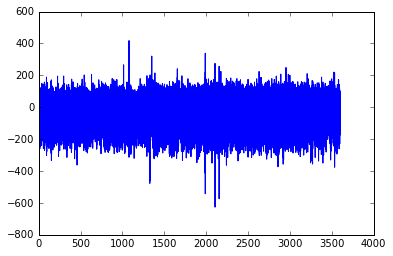

In [12]:
plt.plot(ndf_file[6]['time'], ndf_file[6]['data'])

There is also a really small convienance funtion in the module that lets you select time in seconds.

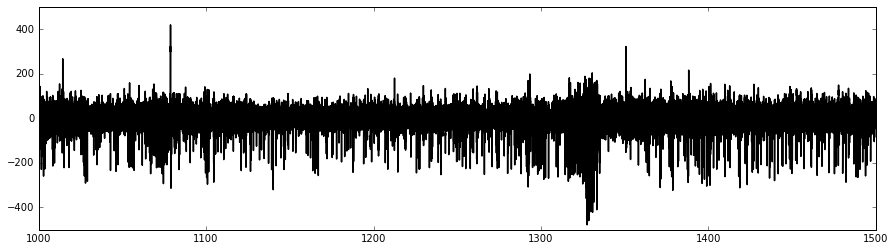

In [13]:
pg.basic_plot(ndf_file[6], time_tuple=(1000,1500))

To save to csv it is probably easiest to use pandas:

In [14]:
data = ndf_file[6]['data']
data.shape

(921600,)

In [16]:
import pandas as pd
df = pd.DataFrame(data)

In [17]:
df.to_csv('transmitter_6.csv')

# Saving the file:
- save method saves the file as a hdf5 file


In [19]:
%%time
ndf_file = pg.NdfFile(ndf_filepath, verbose = True, fs = 'auto')
ndf_file.load(read_ids=[6])

Tid 6: Detected 2129 bad messages out of 915624 Remaining : 913495
Tid 6: removed 4 datapoints as glitches. There were 23267 possible glitches.
Tid 6: regularised fs to 256 Hz 921600 datapoints
CPU times: user 323 ms, sys: 122 ms, total: 446 ms
Wall time: 457 ms


In [20]:
%%time
ndf_file.save()

Saved data as:test_ndf_conversion/M1456819229_Tid_[6].h5 Resampled = True
CPU times: user 296 ms, sys: 10.9 ms, total: 307 ms
Wall time: 309 ms


# Loading the file after saving
- much quicker... :p

In [23]:
%time
h5file = pg.H5File('test_ndf_conversion/M1456819229_Tid_[6].h5')

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [24]:
h5file[6]

{'data': array([-66.79174042, -66.11012268, -65.44735718, ...,  -3.83387399,
         10.01371384,  -1.83560932], dtype=float32),
 'features': None,
 'time': array([  0.00000000e+00,   3.90625419e-03,   7.81250838e-03, ...,
          3.59999219e+03,   3.59999609e+03,   3.60000000e+03], dtype=float32)}

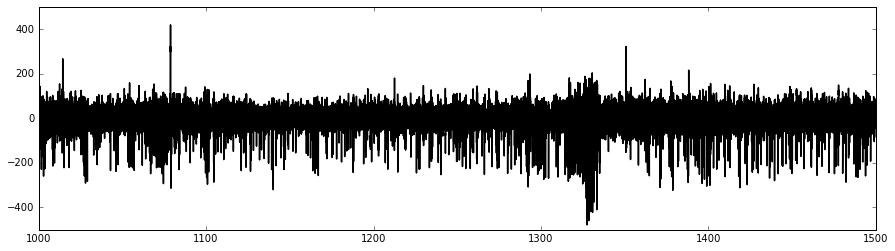

In [25]:
pg.basic_plot(h5file[6], (1000,1500))

# to convert a directory to h5 files:
-uses the default loading options


In [26]:
handler = pg.DataHandler()

In [30]:
%%time
handler.convert_ndf_directory_to_h5(ndf_dir = 'test_ndf_conversion',
                                    tids = 'all',
                                    fs = 256,
                                    n_cores = -1,
                                    save_dir = 'h5_converted')

5 Files for conversion. Transmitters: all
Progress: |██████████████████████████████████████████████████| 100.0% Complete
CPU times: user 72 ms, sys: 77.8 ms, total: 150 ms
Wall time: 3.84 s
